In [1]:
import sys
sys.path.append('/zfsauton3/home/bparia/hf_moe')

import data_loader
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [200]:
dataset = 'm5'

In [215]:
with open(f'../data/{dataset}/data.pkl', 'rb') as fin:
    tree, ts_data, _ = pickle.load(fin)

leaves = np.where(tree.leaf_vector.astype(np.bool))[0]
non_leaves = np.where(1-tree.leaf_vector.astype(np.bool))[0]

[0.53436905 0.1311492 ]


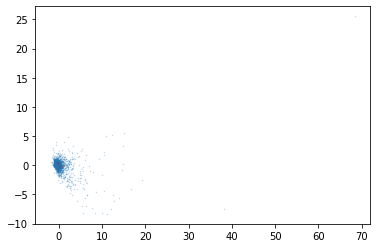

In [203]:
with open(f'../logs/{dataset}/hid_20_exp_8_norm/run_1/emb.pkl', 'rb') as fin:
    emb = pickle.load(fin)

pca = PCA(n_components=2, svd_solver='full')
emb_2d = pca.fit_transform(emb)
print(pca.explained_variance_ratio_)
plt.scatter(emb_2d[leaves, 0], emb_2d[leaves, 1], alpha=0.3, s=0.2)
plt.scatter(emb_2d[non_leaves, 0], emb_2d[non_leaves, 1], alpha=0.3, s=0.2, c='r')

[0.53436905 0.1311492 ]


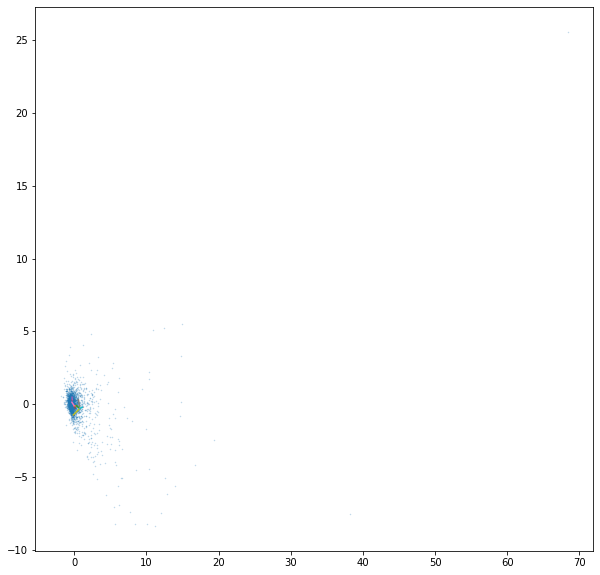

In [204]:
with open(f'../logs/{dataset}/hid_20_exp_8_norm/run_1/emb.pkl', 'rb') as fin:
    emb = pickle.load(fin)

pca = PCA(n_components=2, svd_solver='full')
emb_2d = pca.fit_transform(emb)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 10))
plt.scatter(emb_2d[leaves, 0], emb_2d[leaves, 1], alpha=0.3, s=0.2)
plt.scatter(emb_2d[non_leaves, 0], emb_2d[non_leaves, 1], alpha=0.3, s=0.2, c='r')
num_points = len(non_leaves)

for i in range(num_points):
    for j in range(i+1, num_points):
        ida = non_leaves[i]
        idb = non_leaves[j]
        if tree.adj_matrix[ida, idb]:
            x = [emb_2d[ida, 0], emb_2d[idb, 0]]
            y = [emb_2d[ida, 1], emb_2d[idb, 1]]
            plt.plot(x, y)

[0.53436905 0.1311492 ]
Sub tree 570
num_ch 532


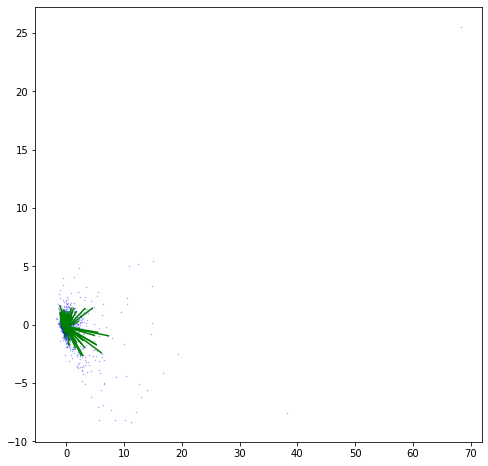

In [248]:
with open(f'../logs/{dataset}/hid_20_exp_8_norm/run_1/emb.pkl', 'rb') as fin:
    emb = pickle.load(fin)

pca = PCA(n_components=2, svd_solver='full')
emb_2d = pca.fit_transform(emb)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 8))
plt.scatter(emb_2d[leaves, 0], emb_2d[leaves, 1], alpha=0.3, s=0.3, c='b')
plt.scatter(emb_2d[non_leaves, 0], emb_2d[non_leaves, 1], alpha=0.3, s=0.3, c='r')
num_points = len(non_leaves)

sub_tree = np.random.choice(tree.levels[2])
print('Sub tree', sub_tree)

sleaves = tree.leaf_matrix[sub_tree]
sleaves = np.where(sleaves.astype(np.bool))[0]
print('num_ch', len(sleaves))
# plt.scatter(emb_2d[sub_tree, 0], emb_2d[sub_tree, 1], c='y')

for id in sleaves:
    x = [emb_2d[sub_tree, 0], emb_2d[id, 0]]
    y = [emb_2d[sub_tree, 1], emb_2d[id, 1]]
    plt.plot(x, y, c='g')